In this notebook you'll create your own bootstrap function following the bootstrap algorithm (check the lecture notes!)

In [1]:
import matplotlib
import pandas as pd
import seaborn as sns
import numpy as np
import random

In [2]:
# Load the data
df = pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab2%20-%20bootstrap/customers.csv')
data = df.values.T[1]
data

array([ 2.,  8., 20., 13.,  5.,  9., 10.,  8., 22., 10.,  2.,  4.,  7.,
        9.])

In [3]:
df

,Day,Millons of pounds in sales
0,1,2.0
1,2,8.0
2,3,20.0
3,4,13.0
4,5,5.0
5,6,9.0
6,7,10.0
7,8,8.0
8,9,22.0
9,10,10.0


In [4]:
# Checking the notes from the lecture, create here your own bootstrap function:
# 1. Sample from the input array x to create an array of samples of shape (n_bootstraps, sample_size)
# Hint: Check the function random.choice() on Numpy
# 2. Calculate and save the mean of the array (this is "data_mean" that is returned by the function)
# 3. Calculate the mean from each bootstrap (i.e., row) and store it.
# (This should be an array of n_bootstraps values)
# 4. Calculate the lower and upper bounds for a 95% CI (hint: check the percentile function on Numpy)
# 5. Return data_mean, and the lower and upper bounds of your interval

def bootstrap_mean(x, sample_size, n_bootstraps):
  mean = []
  for i in range(0, n_bootstraps):
    sample_n = np.random.choice(x, sample_size)
    mean.append(np.mean(sample_n))
  data_mean = np.mean(mean)
  lower = np.percentile(mean, 2.5)
  upper = np.percentile(mean, 97.5)
  return data_mean, lower, upper

In [5]:
X = data
sample_size = data.shape[0]
n_bootstraps = 10
#np.random.choice(X, sample_size, (n_bootstraps))
np.random.choice(X ,size = (n_bootstraps, sample_size))

array([[ 8., 20.,  8., 20., 10.,  9.,  5., 13.,  2.,  4.,  4.,  8.,  2.,
         4.],
       [ 2., 10., 20., 22.,  4., 22.,  8., 22.,  4.,  8.,  2., 10.,  9.,
         9.],
       [13.,  8., 13.,  8., 13., 13., 10., 13., 20.,  8.,  8., 10., 20.,
        13.],
       [ 8.,  7.,  4.,  5., 22.,  8., 10., 10.,  2., 10., 22.,  2., 22.,
        22.],
       [ 2.,  9.,  8.,  9., 13., 10.,  2.,  9.,  9.,  5., 10., 22., 13.,
         2.],
       [ 2., 22., 10., 10.,  9., 10., 22.,  5.,  9.,  9., 22.,  9.,  4.,
        22.],
       [ 8.,  4.,  2.,  5., 10.,  4., 20.,  8.,  9.,  5., 10.,  9., 13.,
         2.],
       [10., 22., 10., 13.,  7.,  7.,  7., 10., 20.,  8.,  7.,  5., 13.,
         8.],
       [ 4.,  5.,  2.,  2., 10., 20.,  9., 10.,  8.,  8.,  9.,  5.,  9.,
         2.],
       [ 8.,  9.,  9.,  8.,  8.,  5.,  8., 10., 10.,  9.,  4.,  5.,  8.,
         4.]])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(0.0, 50000.0)

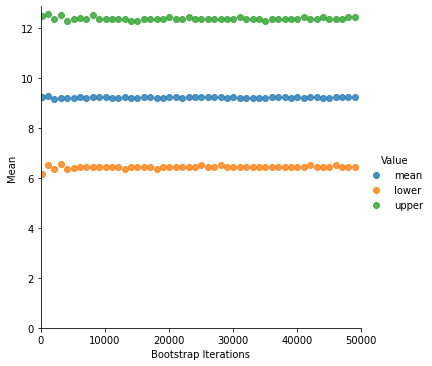

In [6]:
# Call your bootstrap function and plot the results

boots = []
for i in range(100, 50000, 1000): #Range between 100 to 5000, count by 1000
    boot = bootstrap_mean(data, data.shape[0], i)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

df_boot = pd.DataFrame(boots, columns=['Bootstrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 50000)


In [7]:
#Check the content of the above generated DataFrame
df_boot.head(6)

,Bootstrap Iterations,Mean,Value
0,100,9.250714,mean
1,100,6.139286,lower
2,100,12.480357,upper
3,1100,9.277727,mean
4,1100,6.500000,lower
5,1100,12.537500,upper



Now, modify the bootstrap function you created above so that you can pass your desired confidence interval as a parameter.



In [8]:
#Import spicy.stats to create custom confidence interval
import numpy as np
import scipy.stats as st

def bootstrap_mean_ci(sample, sample_size, n_bootstraps, ci): #Use confidence interval by percentage [0% =< ci =< 100%]
  mean = []
  for i in range(0, n_bootstraps):
    sample_n = np.random.choice(sample, sample_size)
    mean.append(np.mean(sample_n))

  #Create custom confidence interval for permutated numpy array using Spicy.stats
  perm_ci = st.t.interval(alpha= (ci/100), df=len(mean)-1, loc=np.mean(mean), scale=st.sem(mean))

  #Calculate mean, lower and upper bound
  data_mean = np.mean(perm_ci)  
  lower = np.percentile(mean, ((100 - ci)/2))
  upper = np.percentile(mean, (ci + (100 - ci)/2))
  return data_mean, lower, upper

In [9]:
def bootstrap_mean_ci(sample, sample_size, n_bootstraps, ci):
  mean = []
  for i in range(0, n_bootstraps):
    sample_n = np.random.choice(sample, sample_size)
    mean.append(np.mean(sample_n))
  data_mean=np.mean(mean)
  lower = np.percentile(mean, (100-ci)/2)
  upper = np.percentile(mean, ((100-ci)/2+ci))
  return data_mean, lower, upper

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(0.0, 50000.0)

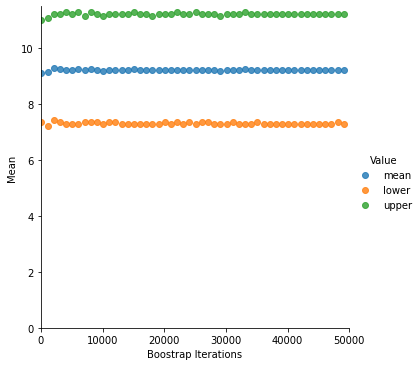

In [10]:
boots = []
for i in range(100, 50000, 1000):
    boot = bootstrap_mean_ci(data, data.shape[0], i, 80)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

df_boot = pd.DataFrame(boots, columns=['Boostrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 50000)

#sns_plot.savefig("bootstrap_confidence_80.pdf", bbox_inches='tight')


In [11]:
df_boot.tail(6)

,Boostrap Iterations,Mean,Value
144,48100,9.223444,mean
145,48100,7.357143,lower
146,48100,11.214286,upper
147,49100,9.208408,mean
148,49100,7.285714,lower
149,49100,11.214286,upper


In [12]:
import numpy as np
import scipy.stats as st

#define sample data
data1 = [12, 12, 13, 13, 15, 16, 17, 22, 23, 25, 26, 27, 28, 28, 29]

#create 95% confidence interval for population mean weight
st.t.interval(alpha=0.95, df=len(data1)-1, loc=np.mean(data1), scale=st.sem(data1))

#(16.758, 24.042)

(16.75776979778498, 24.042230202215016)

In [30]:
bootstrap_mean_ci(data, data.shape[0], 10000, 80)

(9.237185714285715, 7.285714285714286, 11.214285714285714)

In [94]:
def bootstrap_st_ci(sample, sample_size, n_bootstraps, ci):
  standard_deviation = []
  for i in range(0, n_bootstraps):
    sample_n = np.random.choice(sample, sample_size)
    standard_deviation.append(np.std(sample_n))
  standard_deviation_mean = np.mean(standard_deviation)
  lower = np.percentile(standard_deviation, (100-ci)/2)
  upper = np.percentile(standard_deviation, ((100-ci)/2+ci))
  return standard_deviation_mean, lower, upper

In [95]:
bootstrap_st_ci(data, data.shape[0], 10000, 90)

(5.343250541194556, 3.0101867865293537, 7.1185479196038335)

In [97]:
bootstrap_st_ci(data, data.shape[0], 10000, 95)

(5.352014156497179, 2.7302164076594844, 7.346038777074738)

# Vehicles dataset

Now let's work on a different dataset, which is stored in the vehicles.csv file.


Text(0.5, 1.0, 'New fleet')

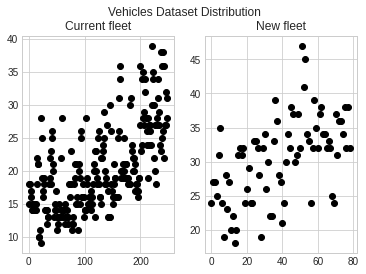

In [14]:
# Load and visualise the vehicles dataset
# To load the dataset: https://neptune.ai/blog/google-colab-dealing-with-files (check section "Load individual files directly from GitHub")
df_vehicles = pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab2%20-%20bootstrap/vehicles.csv')
data_vehicles = df_vehicles.values.T[1]
df_vehicles

# Note that the current and new fleets are in different columns and have different lengths, so bear this in mind when you're plotting.
# You can create separate scatterplots for the two fleets, as you would with the histograms, 
# or plot them both in one plot (but not one against the other).
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Vehicles Dataset Distribution')
ax1.plot(df_vehicles['Current fleet'], 'o', color='black')
ax1.set_title('Current fleet')
ax2.plot(df_vehicles['New Fleet'], 'o', color='black')
ax2.set_title('New fleet')
#plt.plot(df_vehicles['Current fleet'], 'o', color='black')

## Compare the two fleets

The business analysts come up a comparison algorithm that requires the upper and lower bounds for the mean in order to say which fleet is better.
1. Calculate the mean of both samples.
2. Using the bootstrap function that you created:
    - Construct the 95% CI of the mean of the current fleet.
    - Construct the 95% CI of the mean of the new fleet.
    - Are they comparable? (i.e., is one better than the other?) -- you can do this with a permutation test (check the lecture notes!)

In [15]:
# Calculate the mean of both samples.
print(df_vehicles['Current fleet'].mean())
print(df_vehicles['New Fleet'].mean())

20.14457831325301
30.481012658227847


In [93]:
#def bootstrap_mean_ci(sample, sample_size, n_bootstraps, ci)
bootstrap_mean_ci(df_vehicles['Current fleet'], df_vehicles.shape[0], 10000, 99)

(20.14467108433735, 19.120481927710845, 21.253032128514054)

In [49]:
bootstrap_mean_ci(df_vehicles['New Fleet'].dropna().to_list(), df_vehicles['New Fleet'].dropna().shape[0], 10000, 80)

(30.479320253164556, 29.60759493670886, 31.367088607594937)

In [51]:
bootstrap_mean_ci(df_vehicles['New Fleet'].dropna().to_list(), df_vehicles['New Fleet'].dropna().shape[0], 10000, 90)

(30.47319746835443, 29.367088607594937, 31.582278481012658)

In [60]:
# Create your own function for a permutation test here (you will need it for the lab quiz!):
def permut_test(sample1, sample2, n_permutations):
  n = 0
  diff = np.mean(sample2) - np.mean(sample1)
  concat = np.concatenate([sample1, sample2])
  for i in range(n_permutations):
    perm = np.random.permutation(concat)
    pold = perm[:int(len(sample1))]
    pnew = perm[int(len(sample1)):]
    d_perm = np.mean(pnew) - np.mean(pold)
    if d_perm > diff:
      n=n+1
  pvalue = n/n_permutations
  return pvalue

In [62]:
cur_fleet = df_vehicles['Current fleet'].dropna().to_list()
new_fleet = df_vehicles['New Fleet'].dropna().to_list()

pvalue = permut_test(cur_fleet, new_fleet, 30000)
print(pvalue)

0.0


# Voting Dataset

In [21]:
# The variables below represent the percentages of democratic votes in Pennsylvania and Ohio (one value for each state).
dem_share_PA = [60.08, 40.64, 36.07, 41.21, 31.04, 43.78, 44.08, 46.85, 44.71, 46.15, 63.10, 52.20, 43.18, 40.24, 39.92, 47.87, 37.77, 40.11, 49.85, 48.61, 38.62, 54.25, 34.84, 47.75, 43.82, 55.97, 58.23, 42.97, 42.38, 36.11, 37.53, 42.65, 50.96, 47.43, 56.24, 45.60, 46.39, 35.22, 48.56, 32.97, 57.88, 36.05, 37.72, 50.36, 32.12, 41.55, 54.66, 57.81, 54.58, 32.88, 54.37, 40.45, 47.61, 60.49, 43.11, 27.32, 44.03, 33.56, 37.26, 54.64, 43.12, 25.34, 49.79, 83.56, 40.09, 60.81, 49.81]
dem_share_OH = [56.94, 50.46, 65.99, 45.88, 42.23, 45.26, 57.01, 53.61, 59.10, 61.48, 43.43, 44.69, 54.59, 48.36, 45.89, 48.62, 43.92, 38.23, 28.79, 63.57, 38.07, 40.18, 43.05, 41.56, 42.49, 36.06, 52.76, 46.07, 39.43, 39.26, 47.47, 27.92, 38.01, 45.45, 29.07, 28.94, 51.28, 50.10, 39.84, 36.43, 35.71, 31.47, 47.01, 40.10, 48.76, 31.56, 39.86, 45.31, 35.47, 51.38, 46.33, 48.73, 41.77, 41.32, 48.46, 53.14, 34.01, 54.74, 40.67, 38.96, 46.29, 38.25, 6.80, 31.75, 46.33, 44.90, 33.57, 38.10, 39.67, 40.47, 49.44, 37.62, 36.71, 46.73, 42.20, 53.16, 52.40, 58.36, 68.02, 38.53, 34.58, 69.64, 60.50, 53.53, 36.54, 49.58, 41.97, 38.11]

In [74]:
df_dem_share_PA = pd.DataFrame(dem_share_PA, columns=['vote_share'])
df_dem_share_OH = pd.DataFrame(dem_share_OH, columns=['vote_share'])

In [70]:
df_dem_share_PA.size

67

In [71]:
df_dem_share_OH.size

88

In [79]:
bootstrap_mean_ci(df_dem_share_PA['vote_share'], df_dem_share_PA.size, 25000, 90)

(45.47596233432836, 43.54221641791045, 47.4725447761194)

In [87]:
bootstrap_mean_ci(df_dem_share_OH['vote_share'], df_dem_share_OH.size, 25000, 90)

(44.31644615454546, 42.58805113636363, 46.0517215909091)

In [91]:
pvalue = permut_test(df_dem_share_PA['vote_share'], df_dem_share_OH['vote_share'], 20000)
print(pvalue)

0.4658
